In [21]:
!pip install lightgbm

## Chapter 5

### LIME and SHAP
#### Here we will look at Perturbation methods, SHAP for a Non Linear model, LGB (Light Gradient Boosting Classifier)

##### We will look at Local interpretability provided for individual predictions 

We will be observing and interpreting the models using post hoc method 
SHAP <br>

We use the Adult Census dataset from shap <br>

We are using the shap Adult Census datasets. More details on the dataset can be found here <br>
https://shap.readthedocs.io/en/latest/generated/shap.datasets.adult.html



| **Variable**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| Age (float)        | Age in years                                                                    |
| Workclass (category)| Type of employment                                                             |
| fnlwgt (float)     | Final weight; the number of units in the target population that the record represents |
| Education (category)| Highest level of education achieved                                            |
| Education-Num (float)| Numeric representation of education level                                     |
| Marital Status (category)| Marital status of the individual                                          |
| Occupation (category)| Type of occupation                                                            |
| Relationship (category)| Relationship status                                                         |
| Race (category)    | Ethnicity of the individual                                                     |
| Sex (category)     | Gender of the individual                                                        |
| Capital Gain (float)| Capital gains recorded                                                         |
| Capital Loss (float)| Capital losses recorded                                                        |
| Hours per week (float)| Number of hours worked per week                                              |
| Country (category) | Country of origin                                                               |
| Target (category)  | Binary target variable indicating whether the individual earns more than 50K    |

The Education’ column is redundant with ‘Education-Num’ and is dropped for simplicity.

The ‘Target’ column is converted to binary (True/False) where ‘>50K’ is True and ‘<=50K’ is False.

Certain categorical columns are encoded for numerical representation.

**Install the required libraries**

In [ ]:
!pip install shap

**Import the required libraries and set the JS visualization for the interactive mode**

In [7]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

# print the JS visualization code to the notebook
shap.initjs()

**Load the dataset and use the LGB data covnersion**

In [8]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

LightGBM does not train on raw data. It discretizes continuous features into histogram bins, tries to combine categorical features, and automatically handles missing and infinite values.

**Set the Hyperparameters and traing the LGB model**

In [9]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], callbacks=[lgb.callback.early_stopping(50),lgb.log_evaluation(1000)])

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[644]	valid_0's binary_logloss: 0.278029


**Call the TreeExplainer function to get the explanations and extract the shap values**

In [10]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [11]:
print(shap_values.shape)
print(explainer.expected_value)

(32561, 12)
-2.4326672543732544


**Display the force plot for the first data instance**

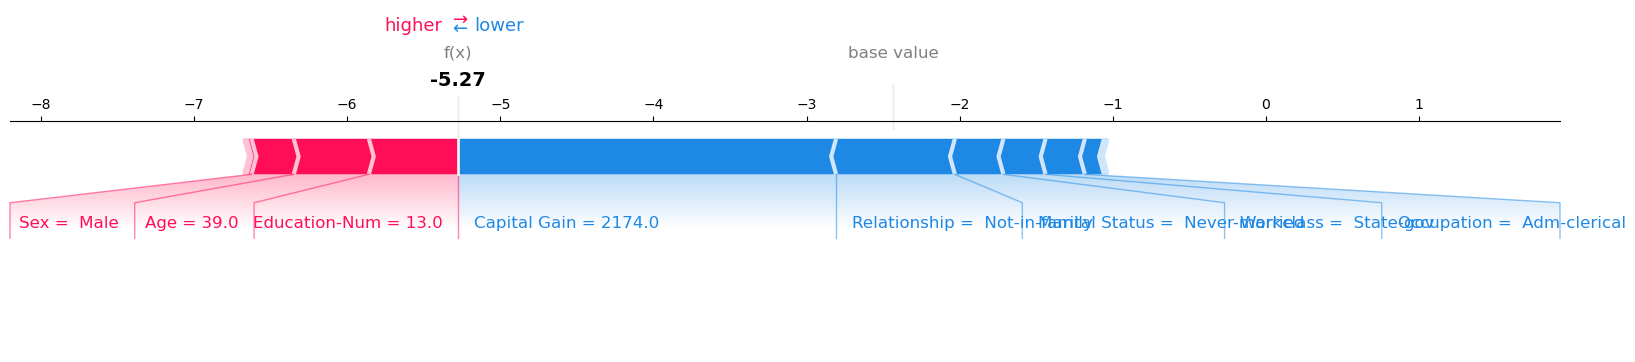

In [12]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:],  matplotlib=True)

**Display summary force plot for 1000 instances**

In [13]:
#The feature can changed in the drop down
#Try with the Age feature and other features to see the difference
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

**Display Summary Plot**

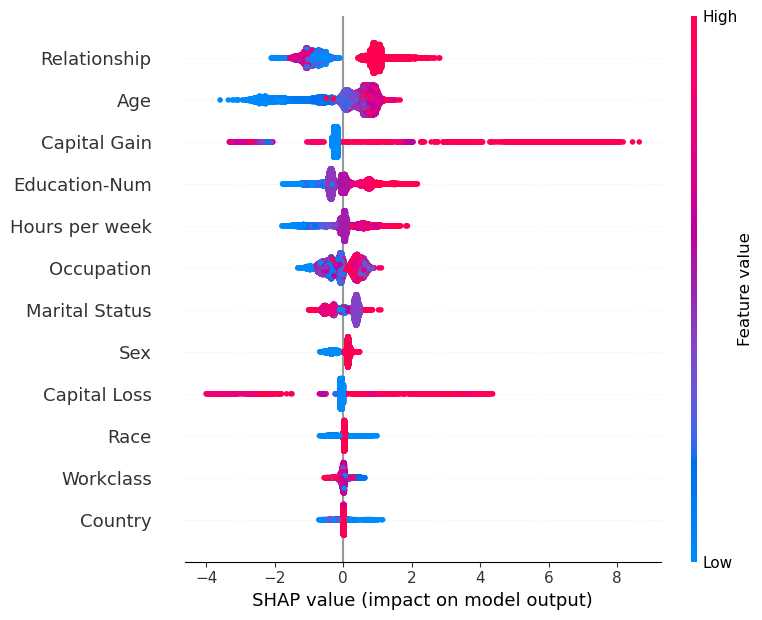

In [14]:
shap.summary_plot(shap_values, X)

SHAP values identify the influential features in a model prediction. Summary and Dependence plots are effective visualization aids for understanding feature importance.

**Display Dependence Plot on the features**

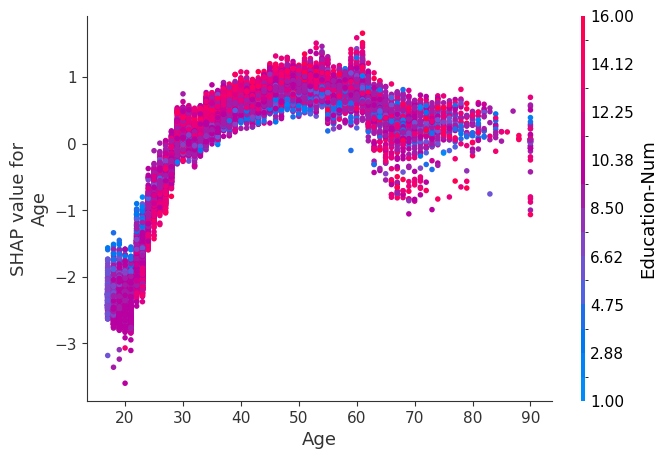

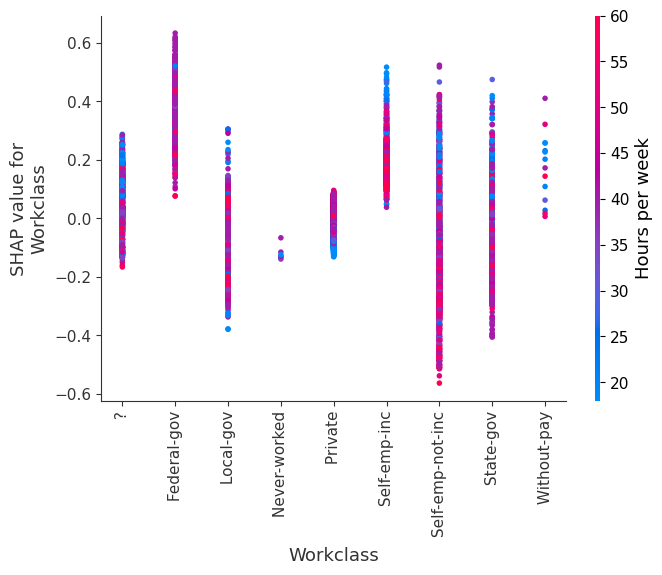

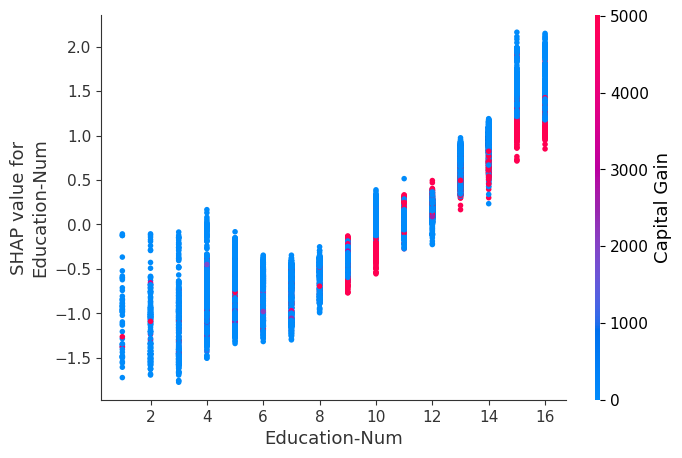

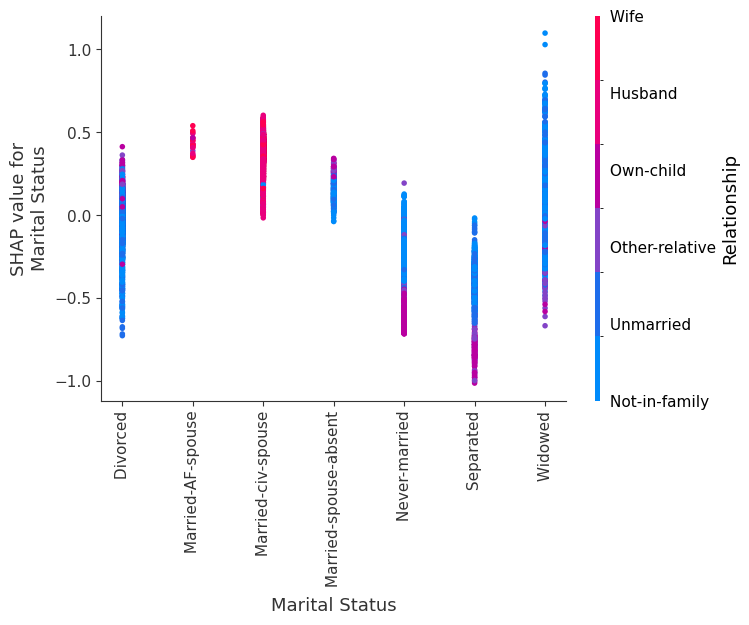

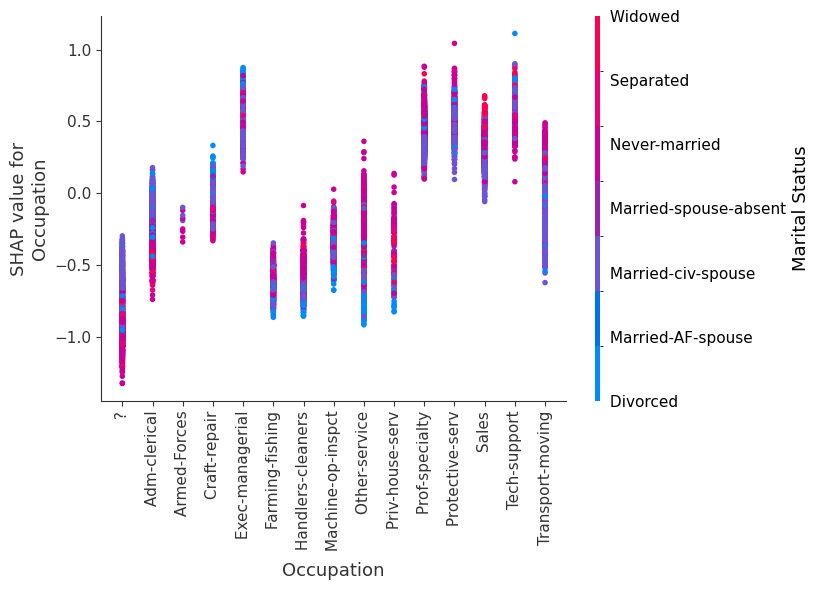

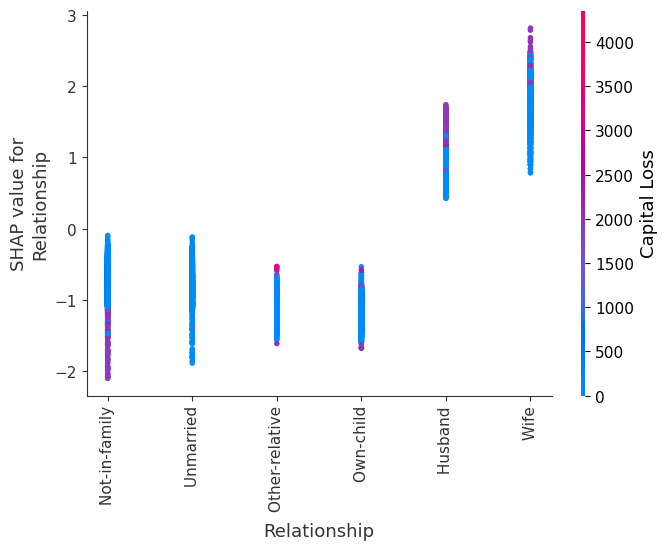

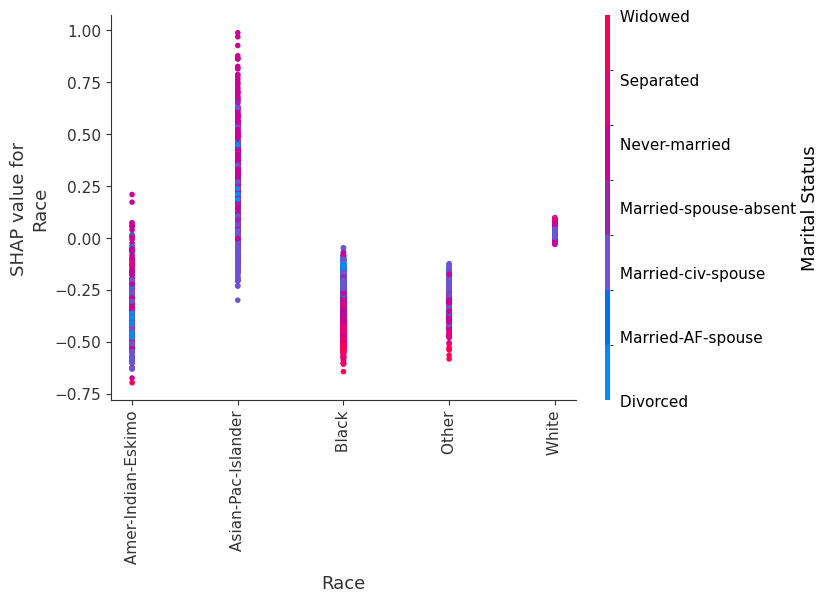

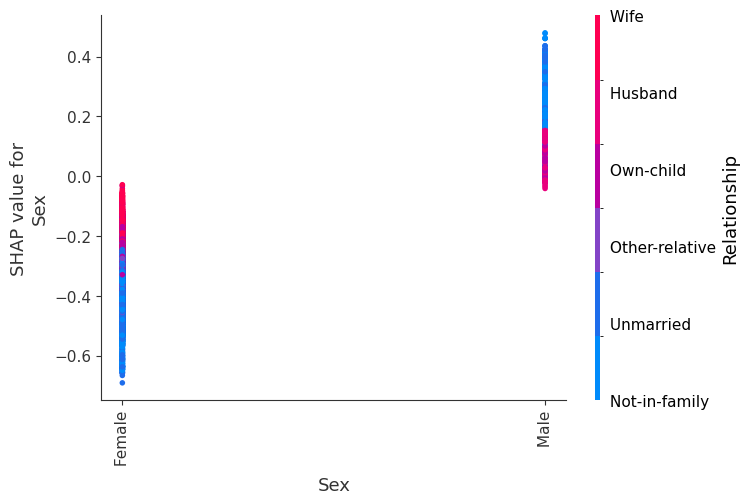

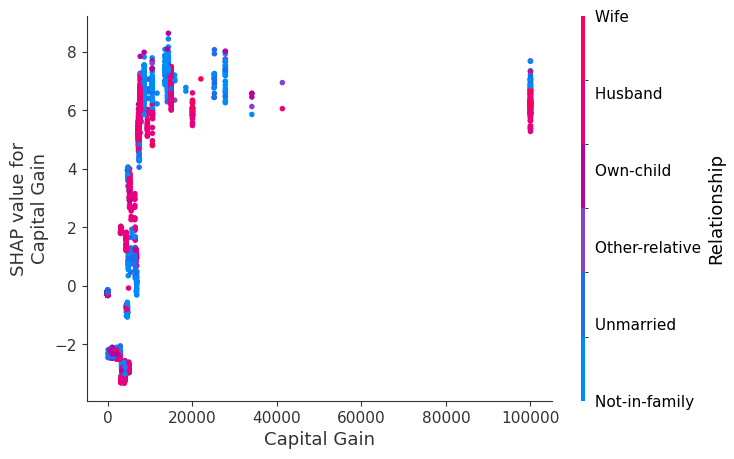

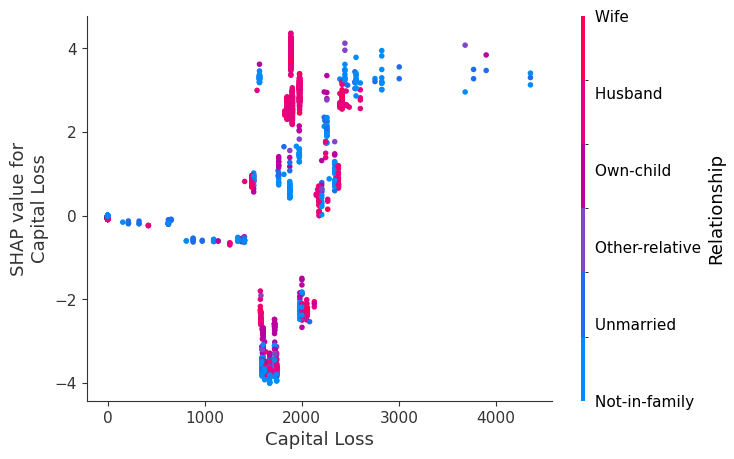

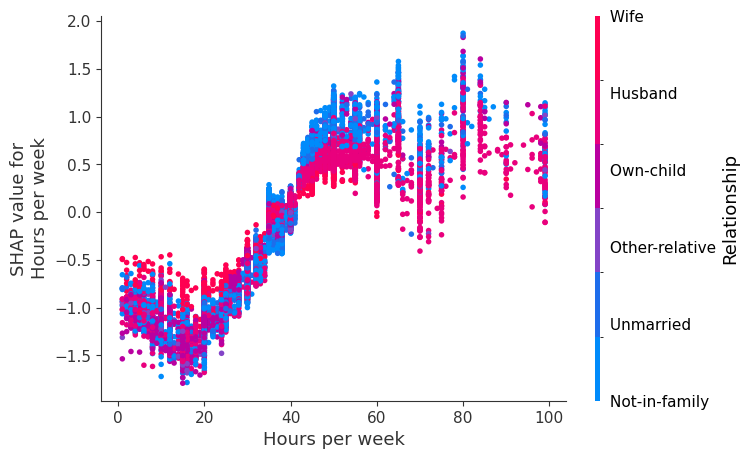

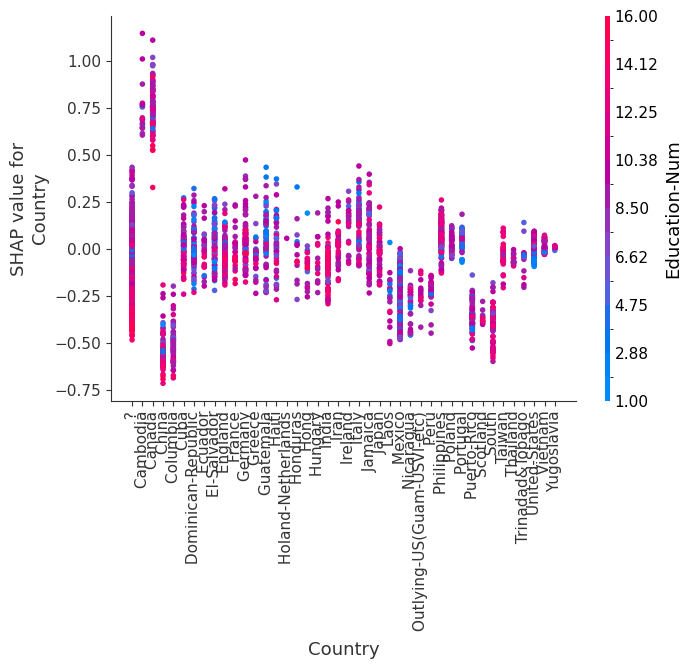

In [15]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)

SHAP dependence plot is a visualization tool that helps understand the relationship between a feature and the model’s prediction. It allows you to see how the relationship between the feature and the prediction changes as the feature value changes